## Extreme Gradient Boosting

In [1]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset 
# Select features (X) and target variable (y)
testing_data=pd.read_csv('testing_data.csv')
training_data= pd.read_csv('new1.csv')
# Training data
X_train = training_data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]  # Features for training
y_train = training_data['aqi']  # Target variable (AQI) for training

# Testing data
X_test = testing_data[['co', 'no2', 'o3', 'pm10', 'pm25', 'so2']]  # Features for testing
y_test = testing_data['aqi']  # Target variable (AQI) for testing

C:\Users\PMLS\AppData\Local\Temp\ipykernel_59496\1359625343.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  training_data= pd.read_csv('new1.csv')


In [3]:
# Create and train the XGBoost model
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [4]:
# Make predictions
y_pred = xgb_model.predict(X_test)

In [5]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = mse ** 0.5
mae = mean_absolute_error(y_test, y_pred)
score = xgb_model.score(X_test, y_test)

In [6]:
# Print evaluation metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f"R-squared: {r2}")
print(f"Score of XGBOOST : {score*100}%")
print(f"Mean Absolute Error: {mae}")

Mean Squared Error: 143.22978810289277
Root Mean Squared Error: 11.96786480968484
R-squared: 0.9511072493417693
Score of XGBOOST : 95.11072493417693%
Mean Absolute Error: 2.869246331926731


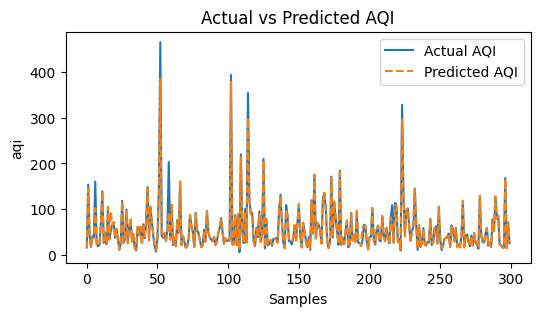

In [9]:
# Plotting Actual vs Predicted AQI
plt.figure(figsize=(6,3))
plt.plot(y_test.values[:300], label='Actual AQI')
plt.plot(y_pred[:300], label='Predicted AQI', linestyle='--')
plt.title('Actual vs Predicted AQI')
plt.xlabel('Samples')
plt.ylabel('aqi')
plt.legend()
plt.show()

In [8]:
# Compute the correlation matrix
correlation_matrix = df[['temp', 'co', 'no2', 'o3', 'pm10', 'pm25', 'so2', 'aqi']].corr()
# Use seaborn heatmap for better visualization
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# Adding title
plt.title('Correlation Matrix of Features', fontsize=10)
plt.figure(figsize=(6, 4.5))
# Display the plot
plt.show()

NameError: name 'df' is not defined